# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [1]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


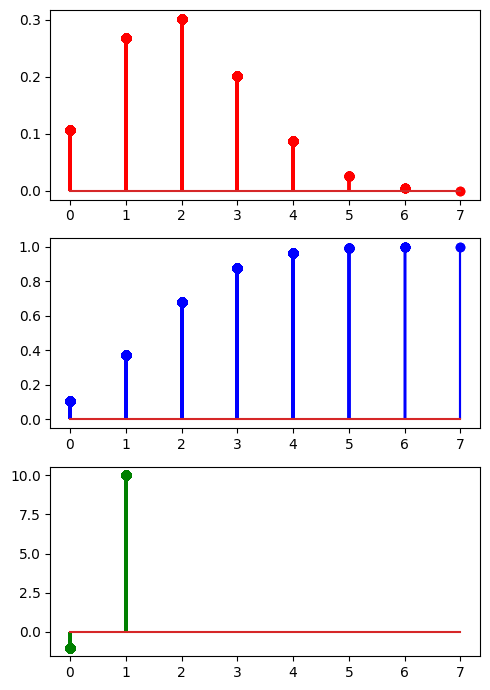

In [5]:
import matplotlib.pyplot as plt

np.random.seed(888)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

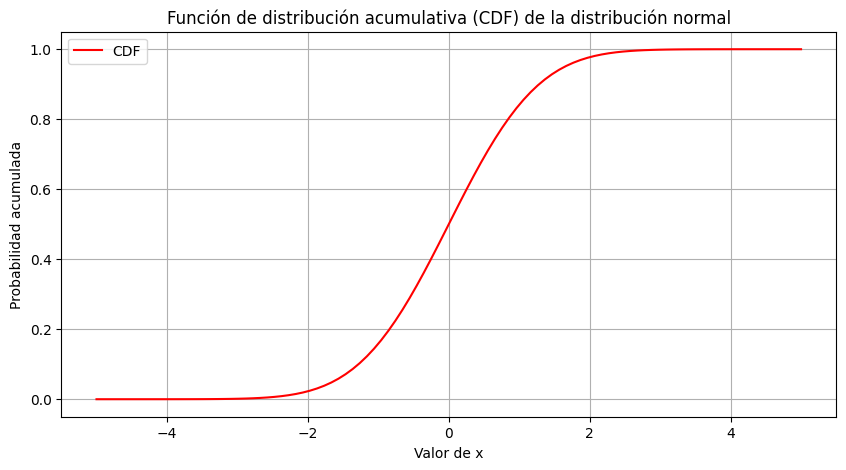

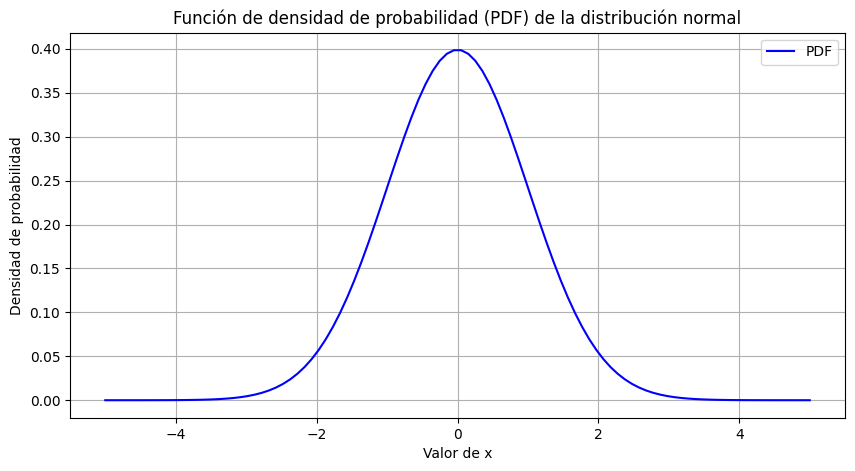

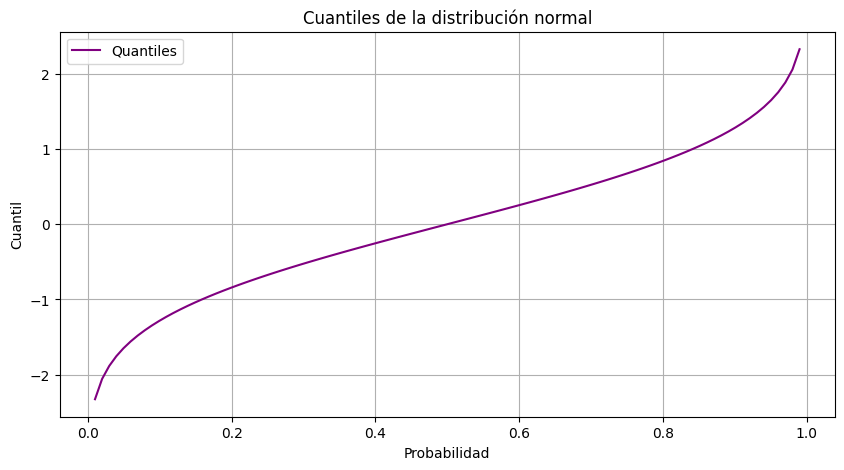

In [19]:
#NORMAL DISTRIBUTIONS

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Función de distribución acumulativa (CDF) de la distribución normal
def pnorm(x, mean=0, std=1):
    return norm.cdf(x, loc=mean, scale=std)

# Función de densidad de probabilidad (PDF) de la distribución normal
def dnorm(x, mean=0, std=1):
    return norm.pdf(x, loc=mean, scale=std)

# Función de cuantil de la distribución normal
def qnorm(p, mean=0, std=1):
    return norm.ppf(p, loc=mean, scale=std)

# Generador de variables aleatorias de la distribución normal
def rnorm(n, mean=0, std=1):
    return norm.rvs(size=n, loc=mean, scale=std)

mean = 0  # Media
std = 1   # Desviación estándar

# Valores de x para evaluar las funciones
x_values = np.linspace(-5, 5, 100)

# Calcular la probabilidad acumulada para cada valor de x
cdf_values = pnorm(x_values, mean, std)

# Calcular la densidad de probabilidad para cada valor de x
pdf_values = dnorm(x_values, mean, std)

# Calcular los cuantiles para diferentes probabilidades
quantiles = qnorm(np.linspace(0.01, 0.99, 100), mean, std)

# Generar 42 variables aleatorias
random_values = rnorm(42, mean, std)

# Graficar la función de distribución acumulativa (CDF)
plt.figure(figsize=(10, 5))
plt.plot(x_values, cdf_values, label='CDF', color='Red')
plt.title('Función de distribución acumulativa (CDF) de la distribución normal')
plt.xlabel('Valor de x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la función de densidad de probabilidad (PDF)
plt.figure(figsize=(10, 5))
plt.plot(x_values, pdf_values, label='PDF', color='Blue')
plt.title('Función de densidad de probabilidad (PDF) de la distribución normal')
plt.xlabel('Valor de x')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# Graficar los cuantiles
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0.01, 0.99, 100), quantiles, label='Quantiles', color='Purple')
plt.title('Cuantiles de la distribución normal')
plt.xlabel('Probabilidad')
plt.ylabel('Cuantil')
plt.legend()
plt.grid(True)
plt.show()


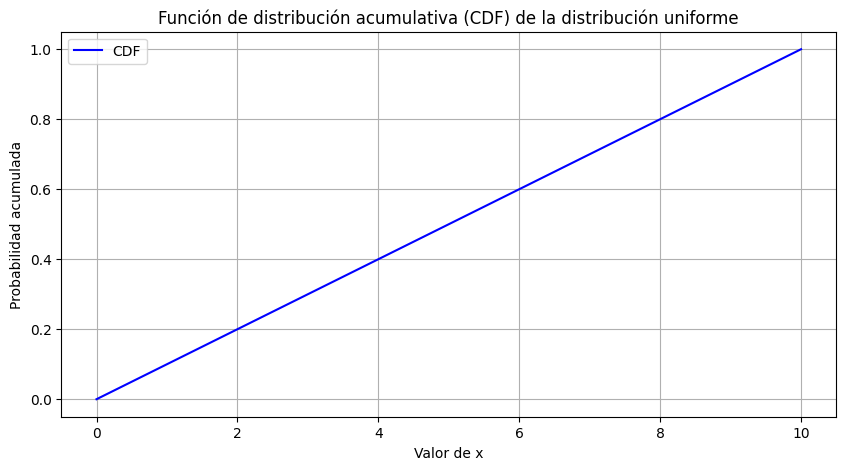

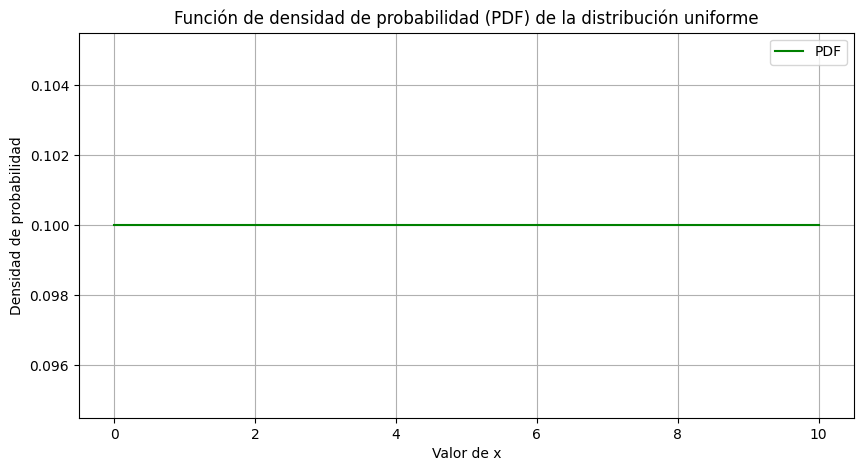

TypeError: 'float' object cannot be interpreted as an integer

<Figure size 1000x500 with 0 Axes>

In [1]:
#UNIFORM DISTRIBUTION

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Función de distribución acumulativa (CDF) de la distribución uniforme
def punif(x, low=0, high=1):
    return uniform.cdf(x, loc=low, scale=high-low)

# Función de densidad de probabilidad (PDF) de la distribución uniforme
def dunif(x, low=0, high=1):
    return uniform.pdf(x, loc=low, scale=high-low)

# Función de cuantil de la distribución uniforme
def qunif(p, low=0, high=1):
    return uniform.ppf(p, loc=low, scale=high-low)

# Generador de variables aleatorias de la distribución uniforme
def runif(n, low=0, high=1):
    return uniform.rvs(size=n, loc=low, scale=high-low)

#Recuerda, esto es un ejemplo de uso de las funciones
low = 0   # Límite inferior
high = 10 # Límite superior

# Valores de x para evaluar las funciones
x_values = np.linspace(low, high, 100)

# Calcular la probabilidad acumulada para cada valor de x
cdf_values = punif(x_values, low, high)

# Calcular la densidad de probabilidad para cada valor de x
pdf_values = dunif(x_values, low, high)

# Calcular los cuantiles para diferentes probabilidades
quantiles = qunif(np.linspace(0.01, 0.99, 100), low, high)

# Generar 42 variables aleatorias
random_values = runif(42, low, high)

# Graficar la función de distribución acumulativa (CDF)
plt.figure(figsize=(10, 5))
plt.plot(x_values, cdf_values, label='CDF', color='blue')
plt.title('Función de distribución acumulativa (CDF) de la distribución uniforme')
plt.xlabel('Valor de x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la función de densidad de probabilidad (PDF)
plt.figure(figsize=(10, 5))
plt.plot(x_values, pdf_values, label='PDF', color='green')
plt.title('Función de densidad de probabilidad (PDF) de la distribución uniforme')
plt.xlabel('Valor de x')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# Graficar los cuantiles
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-5, 5, 0.01), quantiles, label='Quantiles', color='orange')
plt.title('Cuantiles de la distribución uniforme')
plt.xlabel('Probabilidad')
plt.ylabel('Cuantil')
plt.legend()
plt.grid(True)
plt.show()